In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# seed fixing
SEED = 42

In [2]:
df = pd.read_csv('dataset path (copy file path)')
df.to_csv('nasa.csv', index=False)
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,...,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,J2000,False


In [3]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

In [5]:
df.isnull()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4683,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4684,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


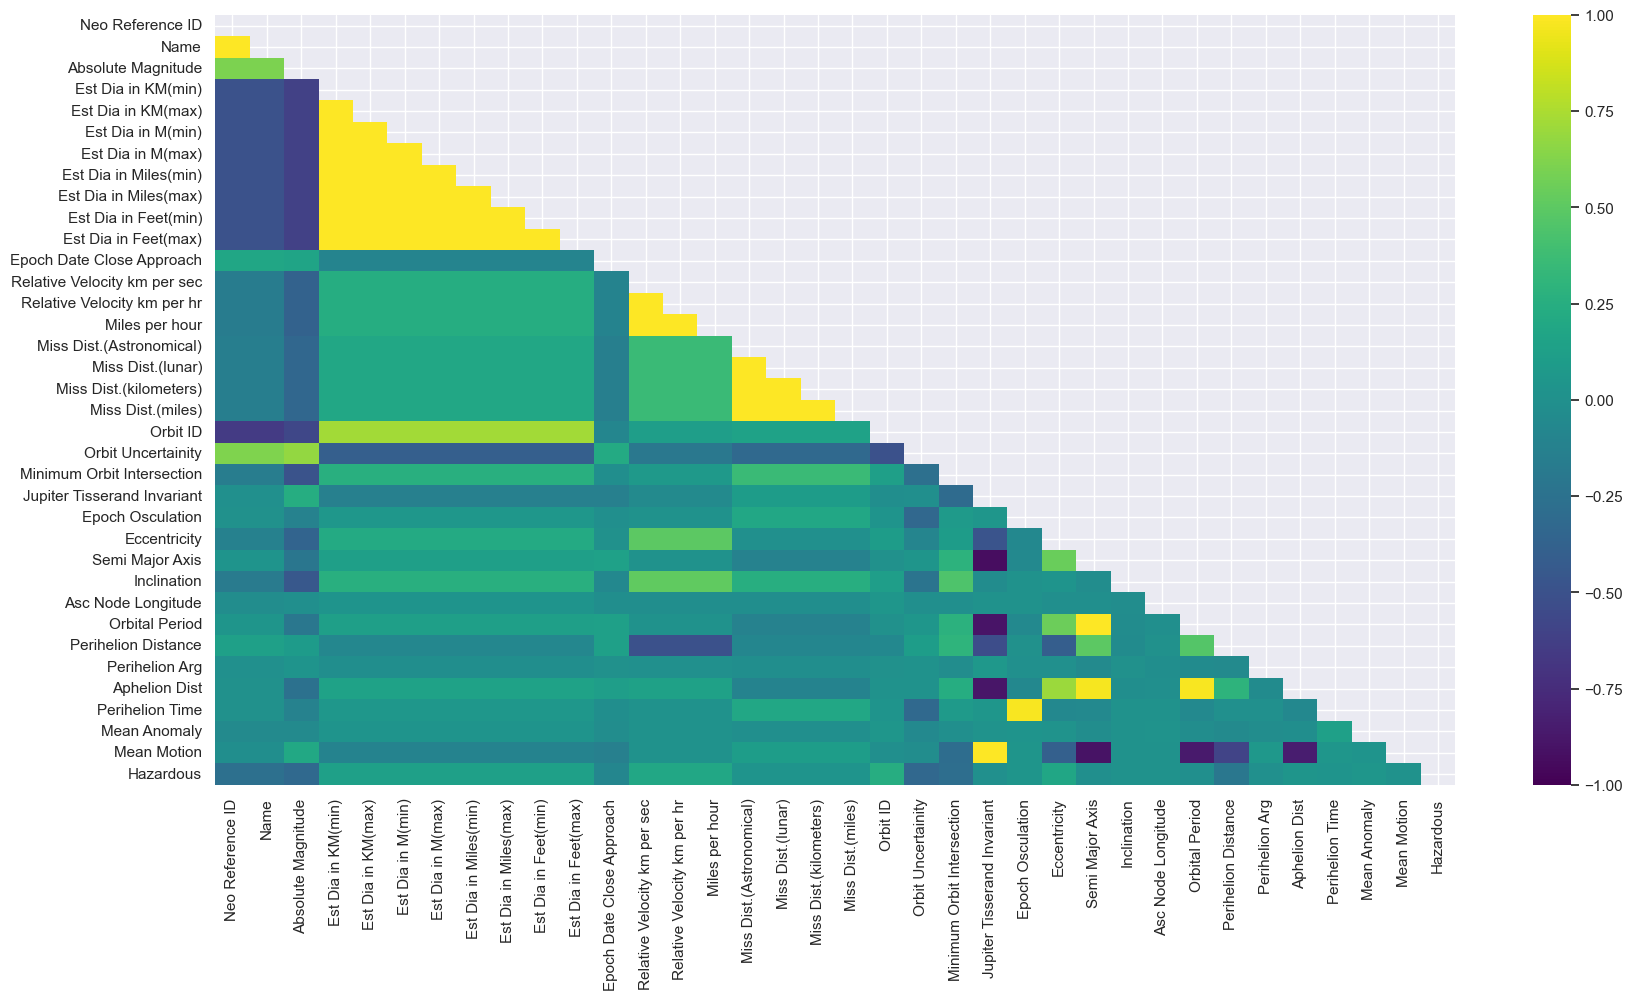

In [6]:
sns.set(rc={'figure.figsize':(20,10)})

mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="viridis", mask = mask)
plt.show()
plt.close()

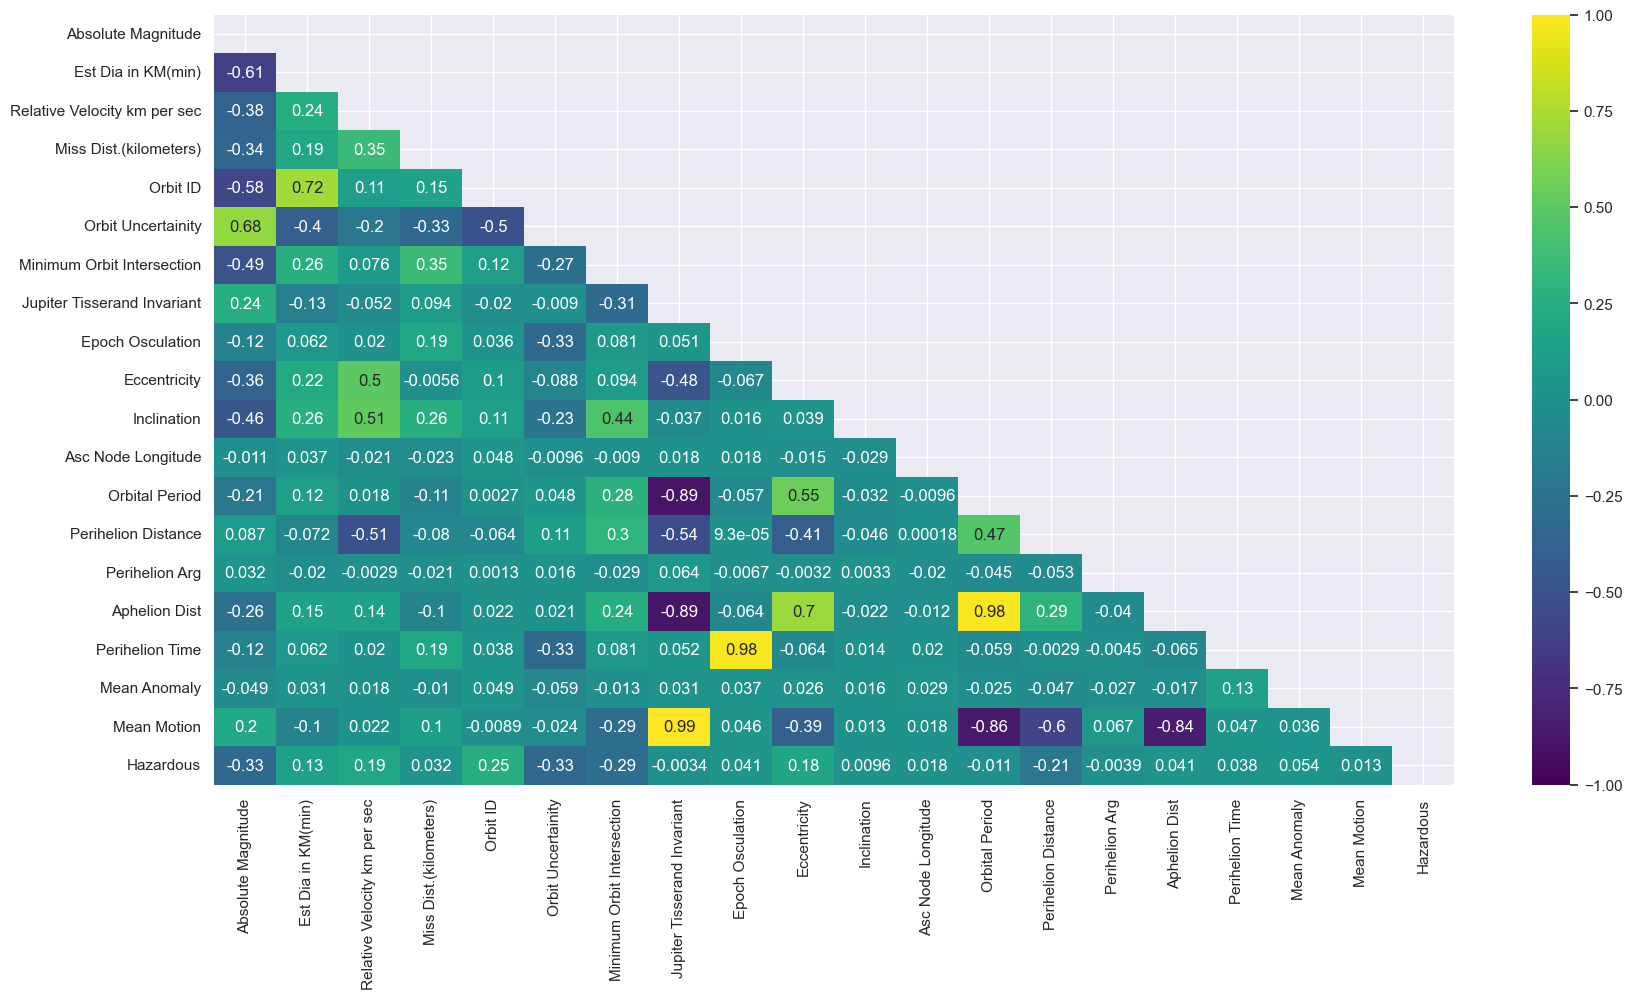

In [7]:
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)


mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="viridis", mask = mask, annot=True)
plt.show()
plt.close()


In [8]:
encoder = LabelEncoder()

df['hazardous'] = encoder.fit_transform(df.Hazardous)

# Dropping these categorical features since they are repeated among all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis = 1)
features = df.drop('hazardous', axis = 1).values
target = df['hazardous'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.7, stratify = target, random_state = SEED)

In [9]:
features = df.drop('hazardous', axis=1).values
label = df.hazardous.values

# Creating the test/train split
training_features, test_features, training_label, test_label = train_test_split(features, label,
                                                                                test_size=0.8,
                                                                                stratify=label,
                                                                                random_state=SEED)

df_graph = df.copy()
feature_names = df_graph.drop('hazardous', axis=1).columns.tolist()
feature_names

['Absolute Magnitude',
 'Est Dia in KM(min)',
 'Relative Velocity km per sec',
 'Miss Dist.(kilometers)',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Eccentricity',
 'Inclination',
 'Asc Node Longitude',
 'Orbital Period',
 'Perihelion Distance',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion']

In [10]:
#Classification using decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_holdout_score = DecisionTreeClassifier()
decision_tree_holdout_score.fit(X_train, y_train)
print('Training data accuracy {:.2f}'.format(decision_tree_holdout_score.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree_holdout_score.score(X_test, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 99.27


99.27%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2752
           1       0.98      0.97      0.98       529

    accuracy                           0.99      3281
   macro avg       0.99      0.98      0.99      3281
weighted avg       0.99      0.99      0.99      3281



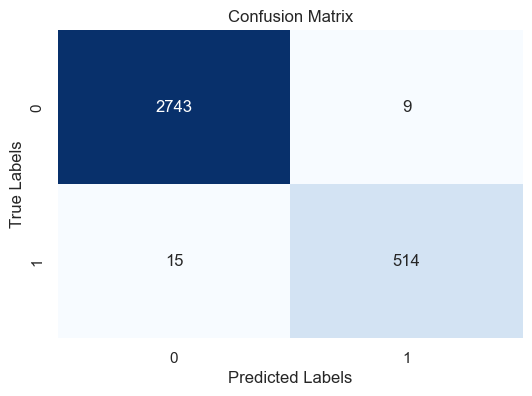

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions =decision_tree_holdout_score .predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=decision_tree_holdout_score.classes_, yticklabels=decision_tree_holdout_score.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
#Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print('Training data accuracy {:.2f}'.format(random_forest.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(X_test, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 99.51


99.51%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       0.99      0.98      0.98       529

    accuracy                           1.00      3281
   macro avg       0.99      0.99      0.99      3281
weighted avg       1.00      1.00      1.00      3281



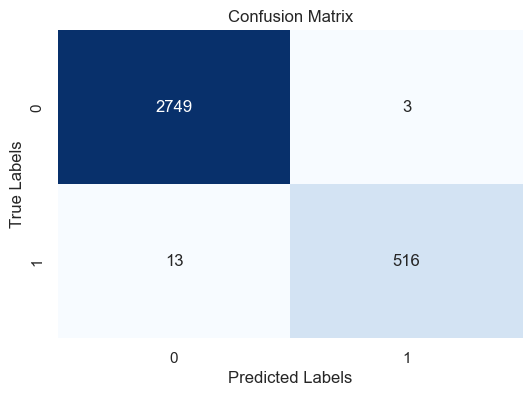

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = random_forest.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
#Classification using Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print('Training data accuracy {:.2f}'.format(svm.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(X_test, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 83.91


83.91%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2752
           1       1.00      0.00      0.00       529

    accuracy                           0.84      3281
   macro avg       0.92      0.50      0.46      3281
weighted avg       0.86      0.84      0.77      3281



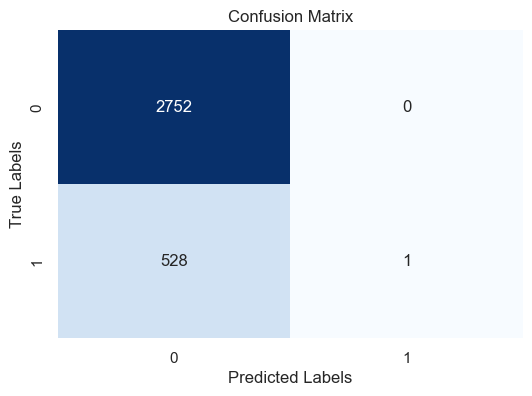

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = svm.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#Classification using K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train,y_train)
print('Training data accuracy {:.2f}'.format(knn.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(knn.score(X_test, y_test)*100))

Training data accuracy 84.21
Testing data accuracy 82.44


82.44%
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2752
           1       0.24      0.04      0.07       529

    accuracy                           0.82      3281
   macro avg       0.54      0.51      0.49      3281
weighted avg       0.74      0.82      0.77      3281



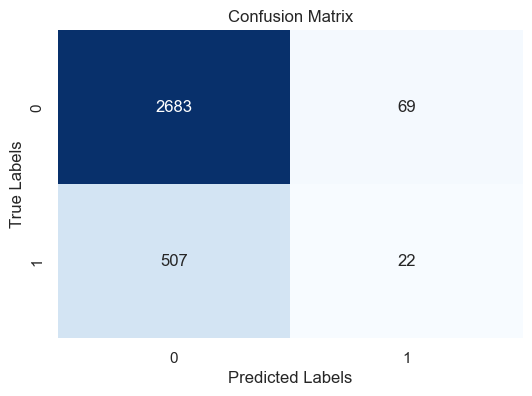

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = knn.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Evaluate training and testing accuracy
train_accuracy = xgb_classifier.score(X_train, y_train) * 100
test_accuracy = xgb_classifier.score(X_test, y_test) * 100

print('Training data accuracy: {:.2f}'.format(train_accuracy))
print('Testing data accuracy: {:.2f}'.format(test_accuracy))


Training data accuracy: 100.00
Testing data accuracy: 99.48


99.48%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       0.99      0.98      0.98       529

    accuracy                           0.99      3281
   macro avg       0.99      0.99      0.99      3281
weighted avg       0.99      0.99      0.99      3281



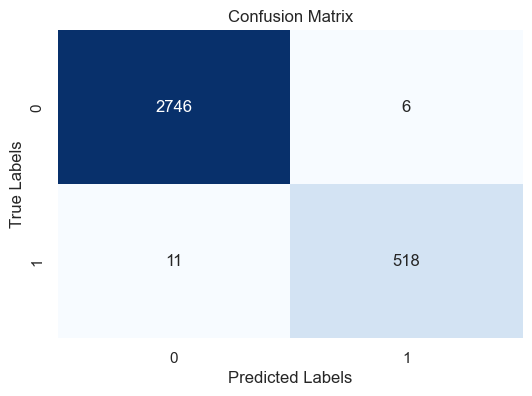

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = xgb_classifier.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

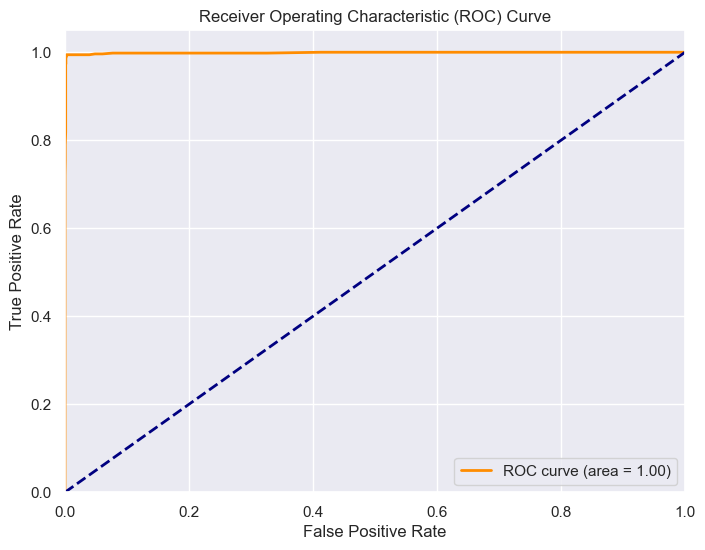

In [27]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_probs = random_forest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
